In [1]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")
from leitmotifs.plotting import *

# import numpy as np
# import pandas as pd
import seaborn as sns
from leitmotifs.lama import *

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

def normalize(x) :
    std = np.std(x)
    mean = np.mean(x)
    if std == 0:
        return x - mean
    return (x - mean) / std

In [2]:
def load_crypto():
    ada_eur = pd.read_csv("../datasets/crypto/ADA-EUR.csv").set_index("Date")[["Close", "Volume"]]
    bitcoin_usd = pd.read_csv("../datasets/crypto/BTC-USD.csv").set_index("Date")[["Close", "Volume"]]
    bitcoin_gbp = pd.read_csv("../datasets/crypto/BTC-GBP.csv").set_index("Date")[["Close", "Volume"]]
    bitcoin_eur = pd.read_csv("../datasets/crypto/BTC-EUR.csv").set_index("Date")[["Close", "Volume"]]
    bitcoin_cash = pd.read_csv("../datasets/crypto/BCH-EUR.csv").set_index("Date")[["Close", "Volume"]]
    ethereum = pd.read_csv("../datasets/crypto/ETH-EUR.csv").set_index("Date")[["Close", "Volume"]]
    litecoin = pd.read_csv("../datasets/crypto/LTC-EUR.csv").set_index("Date")[["Close", "Volume"]]
    solana = pd.read_csv("../datasets/crypto/SOL-EUR.csv").set_index("Date")[["Close", "Volume"]]
    xrp = pd.read_csv("../datasets/crypto/XRP-EUR.csv").set_index("Date")[["Close", "Volume"]]
    
    ada_eur.index = pd.to_datetime(ada_eur.index)
    bitcoin_usd.index = pd.to_datetime(bitcoin_usd.index)
    bitcoin_gbp.index = pd.to_datetime(bitcoin_gbp.index)
    bitcoin_eur.index = pd.to_datetime(bitcoin_eur.index)
    bitcoin_cash.index = pd.to_datetime(bitcoin_cash.index)
    ethereum.index = pd.to_datetime(ethereum.index)
    litecoin.index = pd.to_datetime(litecoin.index)
    solana.index = pd.to_datetime(solana.index)
    xrp.index = pd.to_datetime(xrp.index)
    
    ada_eur["Name"] = "Cardano"
    bitcoin_usd["Name"] = "Bitcoin (USD)"
    bitcoin_gbp["Name"] = "Bitcoin (GBP)"
    bitcoin_eur["Name"] = "Bitcoin (EUR)"
    bitcoin_cash["Name"] = "Bitcoin Cash"
    ethereum["Name"] = "Ethereum"
    litecoin["Name"] = "Litecoin"
    solana["Name"] = "Solana"
    xrp["Name"] = "XRP"
    
    
    for df_apply in [ada_eur, bitcoin_usd, bitcoin_gbp, bitcoin_eur, bitcoin_cash, ethereum, litecoin, solana, xrp]:
        df_apply[["Close"]] = df_apply[["Close"]].apply(np.log2).apply(normalize)
        df_apply[["Volume"]] = df_apply[["Volume"]].apply(normalize)
    
    df = pd.concat([ada_eur, bitcoin_cash, bitcoin_eur, ethereum, litecoin, solana, xrp])  # bitcoin_gbp, bitcoin_usd, 
    df["Name"] = df["Name"].astype("category")
    
    df_pivot = df.pivot(columns="Name", values="Close").fillna(method="bfill")
    
    df_gt = read_ground_truth("../datasets/crypto/crypto")
    
    return df_pivot.T, df, df_gt

df_pivot, df, df_gt = load_crypto() 
df_pivot.head()

../datasets/crypto/crypto_gt.csv


Date,2014-09-17,2014-09-18,2014-09-19,2014-09-20,2014-09-21,2014-09-22,2014-09-23,2014-09-24,2014-09-25,2014-09-26,...,2024-07-07,2024-07-08,2024-07-09,2024-07-10,2024-07-11,2024-07-12,2024-07-13,2024-07-14,2024-07-15,2024-07-16
Name,,,,,,,,,,,,,,,,,,,,,
Bitcoin (EUR),-1.511568,-1.556164,-1.592513,-1.572978,-1.587347,-1.583195,-1.538414,-1.551592,-1.566182,-1.572738,...,1.280274,1.257091,1.265311,1.278782,1.275305,1.269332,1.272263,1.284973,1.301160,1.321211
Bitcoin Cash,2.036123,2.036123,2.036123,2.036123,2.036123,2.036123,2.036123,2.036123,2.036123,2.036123,...,0.154255,0.021376,0.113620,0.105786,0.145488,0.168382,0.248619,0.277243,0.285669,0.283282
Cardano,-1.826284,-1.826284,-1.826284,-1.826284,-1.826284,-1.826284,-1.826284,-1.826284,-1.826284,-1.826284,...,0.376763,0.321453,0.372582,0.387768,0.415503,0.426995,0.465359,0.513183,0.498713,0.496134
Ethereum,-0.862967,-0.862967,-0.862967,-0.862967,-0.862967,-0.862967,-0.862967,-0.862967,-0.862967,-0.862967,...,1.170753,1.131527,1.157141,1.171302,1.180599,1.176761,1.182381,1.194260,1.215021,1.252187
Litecoin,-1.381288,-1.436710,-1.485468,-1.491940,-1.498924,-1.500068,-1.424221,-1.431863,-1.453107,-1.461455,...,0.459792,0.425054,0.454595,0.460226,0.475656,0.478072,0.493288,0.498930,0.502180,0.514091


In [3]:
#fig, ax = plt.subplots(figsize=(8, 4))
#sns.lineplot(x="Date", y="Close", hue="Name", data=df_date, ax=ax)
#sns.despine()

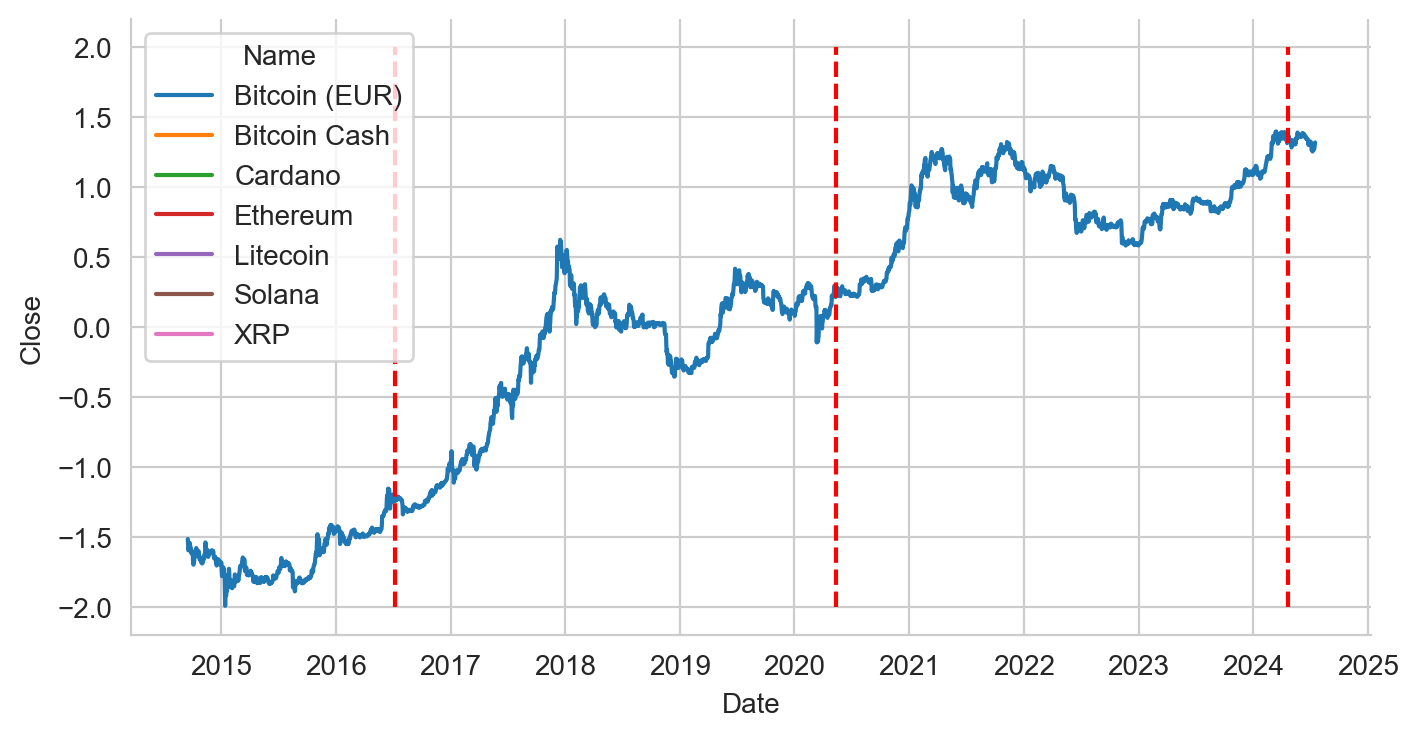

In [4]:
# Halving Events
# 1. Bitcoin Halving	28. November 2012	210.000	25 BTC
# 2. Bitcoin Halving	9. Juli 2016	420.000	12.5 BTC
# 3. Bitcoin Halving	11. Mai 2020	630.000	6.25 BTC
# 4. Bitcoin Halving	20. April 2024	840.000	3.125 BTC


df_date = df.reset_index()
subset = df_date[df_date["Name"]=="Bitcoin (EUR)"]
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x="Date", y="Close", hue="Name", data=subset, ax=ax)
sns.despine()

plt.vlines(x=pd.to_datetime("2016-07-09"), ymin=-2, ymax=2, color="red", linestyle="--")
plt.vlines(x=pd.to_datetime("2020-05-11"), ymin=-2, ymax=2, color="red", linestyle="--")
plt.vlines(x=pd.to_datetime("2024-04-20"), ymin=-2, ymax=2, color="red", linestyle="--")

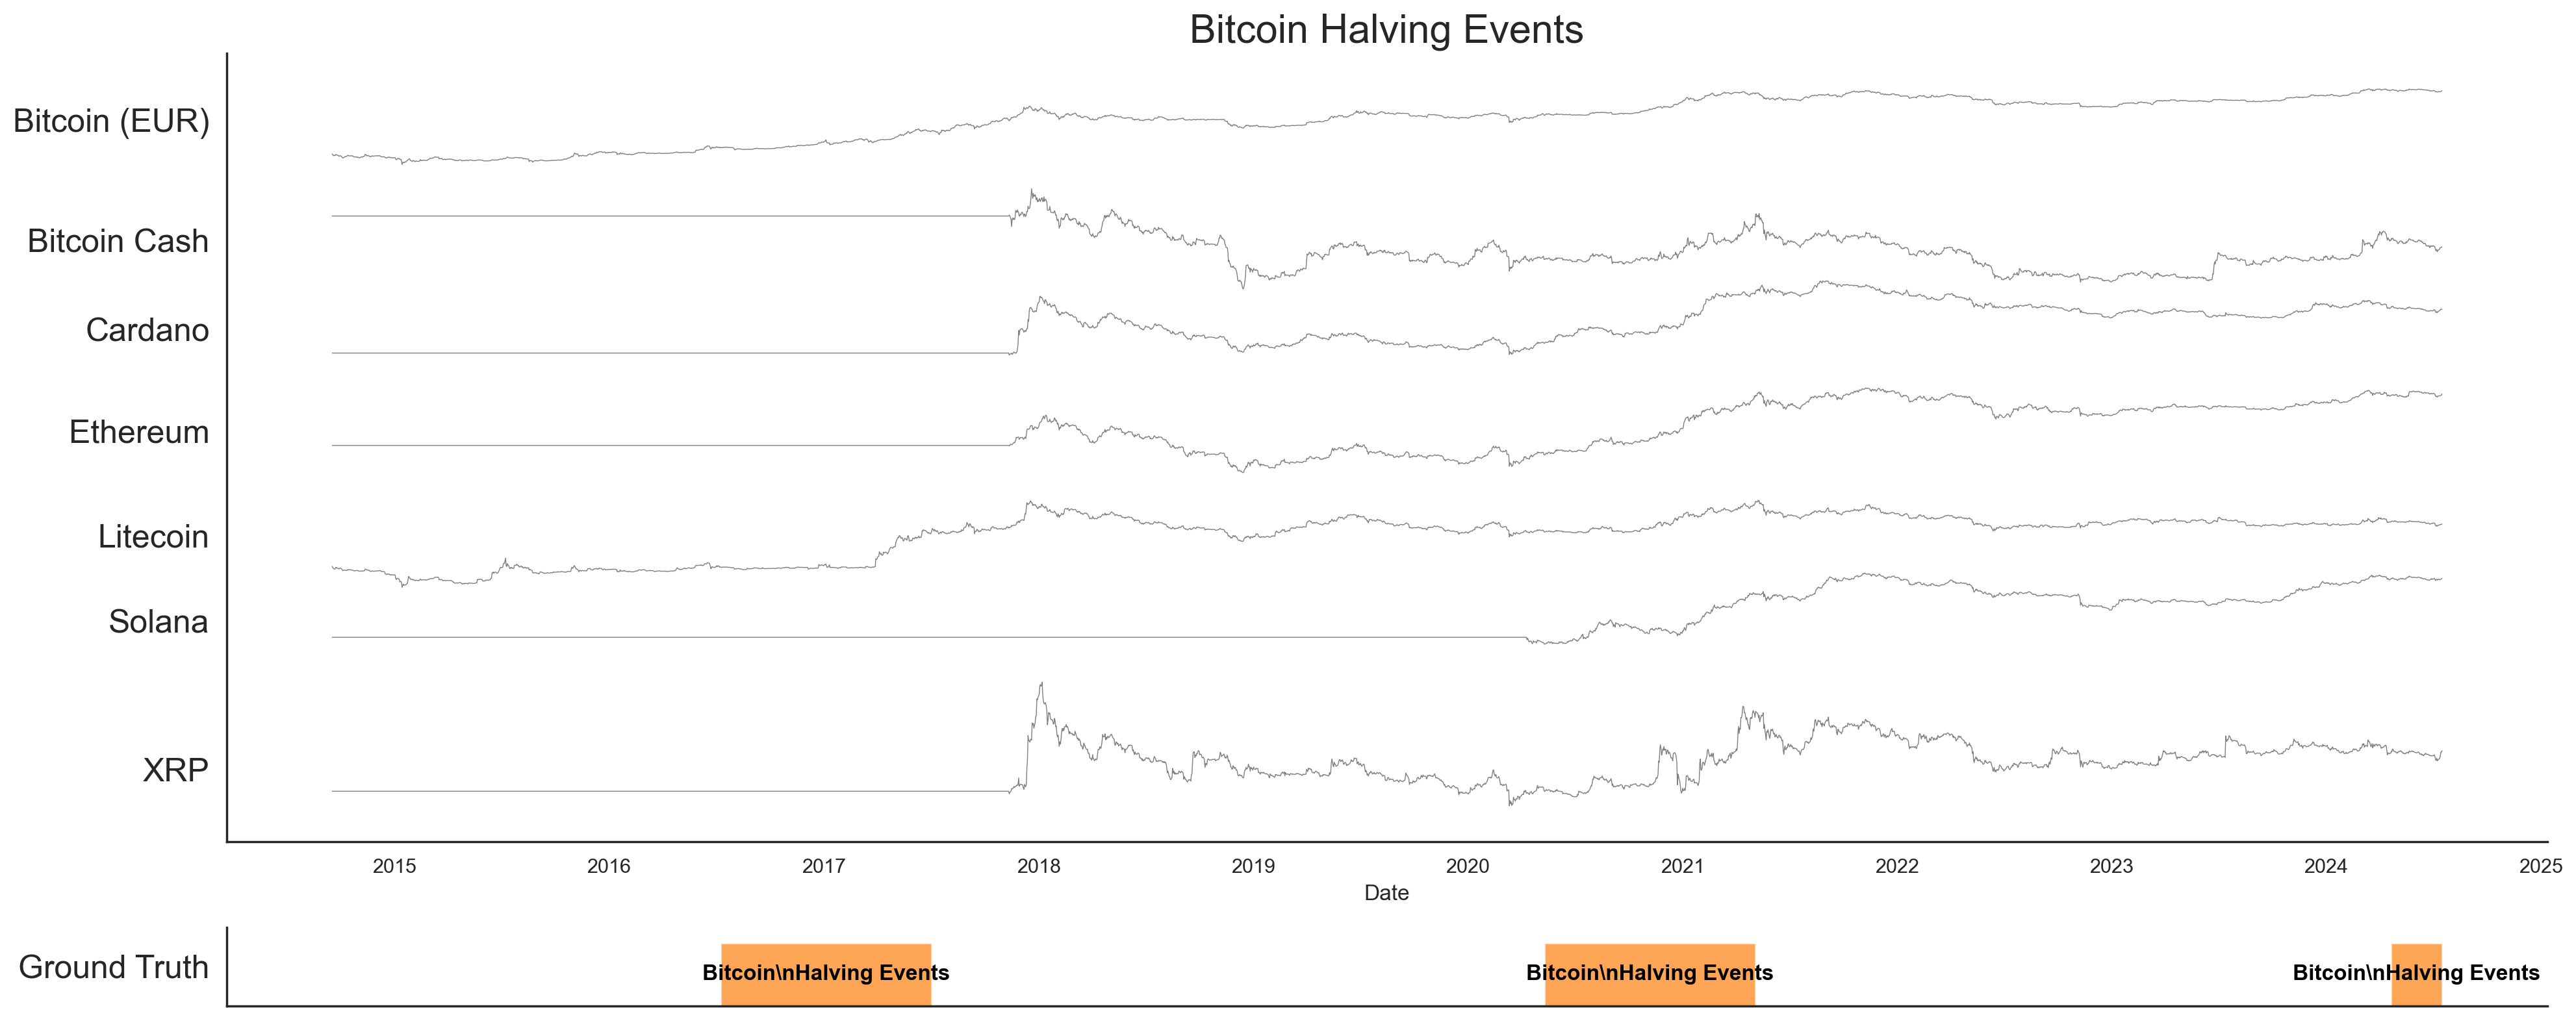

'\n_ = ml.fit_motif_length(\n    k_max,\n    motif_length_range,\n    plot=True,\n    plot_elbows=False,\n    plot_motifsets=True,\n    plot_best_only=True\n)    \n'

In [7]:
# Input Parameters
f = 2         # number of sub-dimensions
ds_name = "Bitcoin Halving Events"
series = df_pivot

# initialize LAMA
ml = LAMA(
    ds_name,  
    series,
    ground_truth=df_gt,
    dimension_labels=series.index,
    n_dims=f,   # number of sub-dimensions
    n_jobs=8    # number of parallel jobs
)

_ = ml.plot_dataset()

"""
_ = ml.fit_motif_length(
    k_max,
    motif_length_range,
    plot=True,
    plot_elbows=False,
    plot_motifsets=True,
    plot_best_only=True
)    
"""

Data (7, 3591)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Compute ks (4):   0%|          | 0/3 [00:00<?, ?it/s]

Chosen window-size: 180 in 11.5 s
Elbow Points [2]


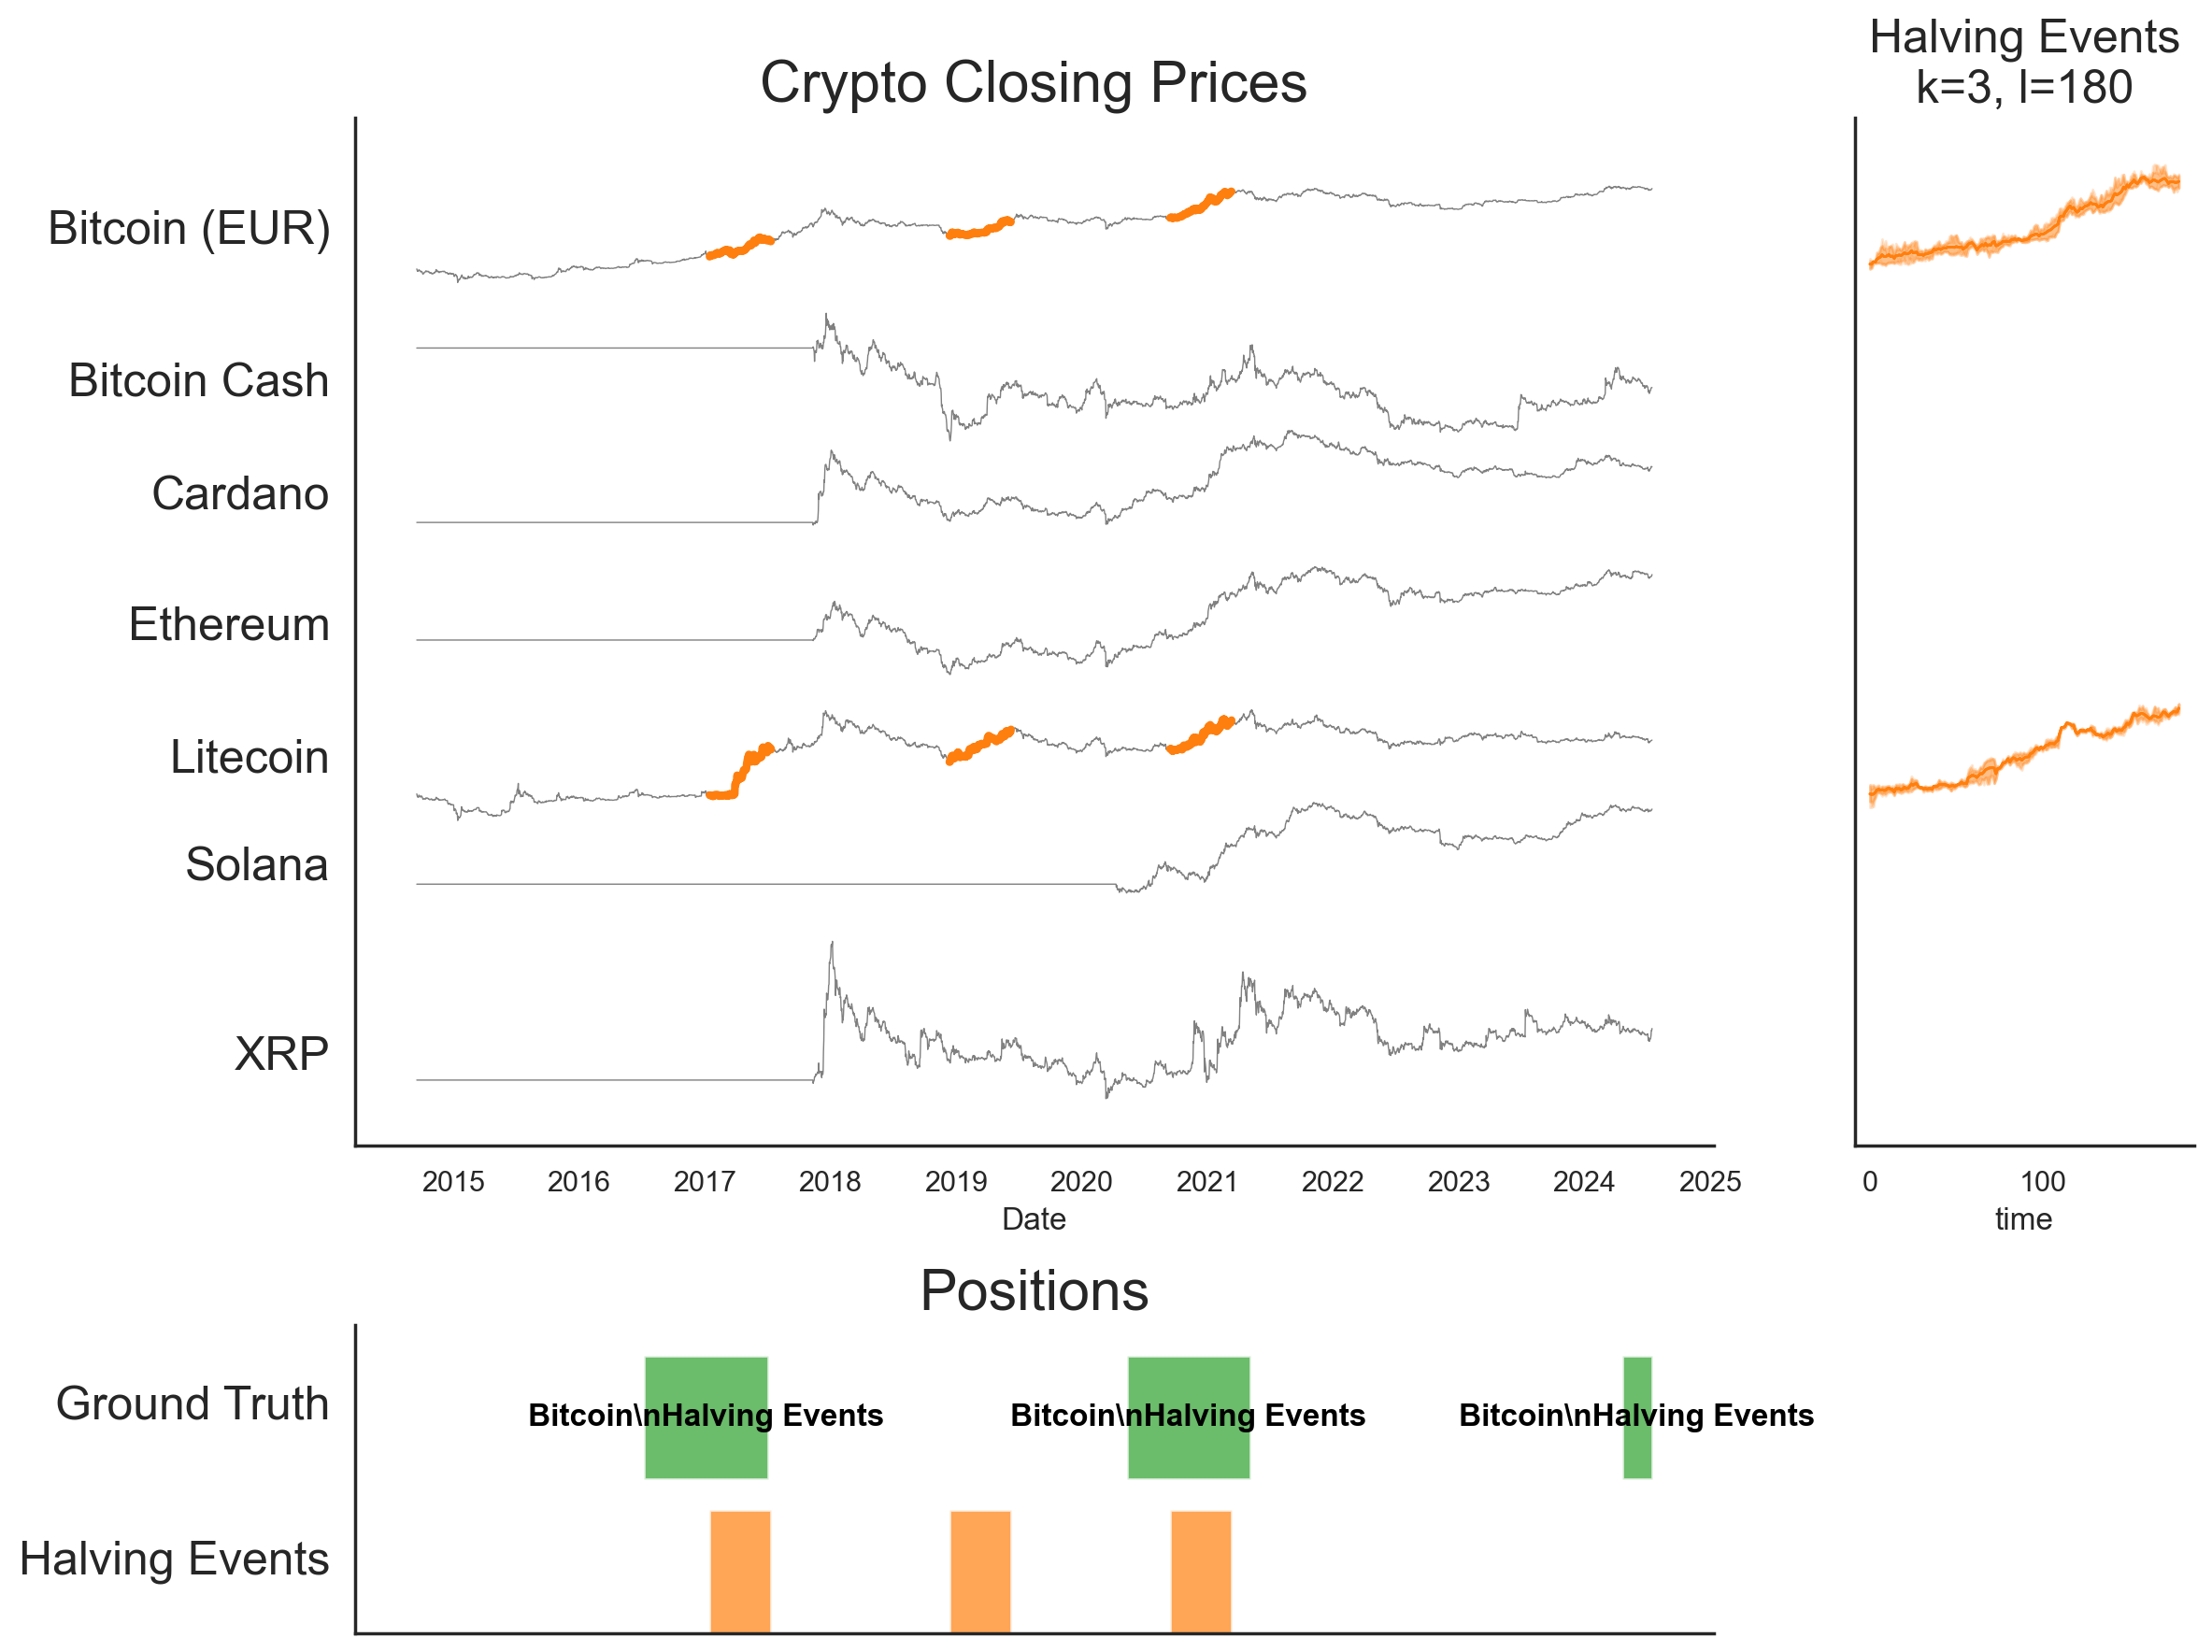

In [8]:
f = 2         # number of sub-dimensions
k_max = 4     # expected number of repeats
ds_name = "Crypto Closing Prices"
series = df_pivot

# initialize LAMA
ml = LAMA(
    ds_name,  
    series,
    # distance="ed",
    ground_truth=df_gt,
    dimension_labels=series.index,
    n_dims=f,   # number of sub-dimensions
    n_jobs=8    # number of parallel jobs
)

dists, motif_sets, elbow_points = ml.fit_k_elbow(
    k_max=k_max,
    motif_length=180,
    plot_elbows=False,
    plot_motifsets=False,
)

ml.elbow_points = [k_max-1]
_ = ml.plot_motifset(motifset_name="Halving Events")

Halving Events: 
https://bisonapp.com/wp-content/uploads/2024/04/bitcoin-halving-verlauf-2024-de.svg

In [9]:
# 1. Bitcoin Halving	28. November 2012	210.000	25 BTC
# 2. Bitcoin Halving	9. Juli 2016	420.000	12.5 BTC
# 3. Bitcoin Halving	11. Mai 2020	630.000	6.25 BTC
# 4. Bitcoin Halving	20. April 2024	840.000	3.125 BTC

date1 = pd.Timestamp("2016-07-09")
date2 = pd.Timestamp("2020-05-11")
date3 = pd.Timestamp("2024-04-20")

offsets = []
for date in [date1, date2, date3]:
    offset = np.argwhere(df_pivot.columns==date).flatten()
    offsets.append(offset[0])
offsets = np.array(offsets)
offsets


array([ 661, 2063, 3503])